<a href="https://colab.research.google.com/github/Doms-debug/ai_test_project/blob/main/ProjektAI_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projekt 5: "Prognozowanie wpływu zmian klimatu na zdrowie publiczne" | Czajka Dominik**

## Ustalenie zakresu problemu: Próba zbadania jak poziom zanieczyszczeń wpływa na długość życia

In [ ]:
import numpy as np
import gdown # pobieranie plików z usługi Google Drive
import pandas as pd # manipulacja i analiza danych
import matplotlib.pyplot as plt # wykresy i wizualizacja danych
import seaborn as sns
from sklearn.model_selection import train_test_split # import funkcji train_test_split do podziału danych na zbiory treningowe i testowe
from sklearn.linear_model import LinearRegression # import klasy LinearRegression czyli modelu regresji liniowej
from sklearn.metrics import mean_squared_error # import funkcji mean_squared_error,
                                               # która oblicza średni błąd kwadratowy (MSE) między rzeczywistymi wartościami wyjściowymi,
                                               # a przewidywanymi wartościami wyjściowymi na podstawie modelu
from sklearn.metrics import r2_score # import funkcji r2_score, która oblicza współczynnik determinancji
import re

## Wczytanie danych dotyczących przewidywanej długości życia w poszczególnych krajach UE

In [ ]:
# https://drive.google.com/file/d/1aG4gGW17QNbHCnao9bhFIXLOeVfmG7Ap

file_id = '1aG4gGW17QNbHCnao9bhFIXLOeVfmG7Ap'  # identyfikator pliku
url_zdrowie = f'https://drive.google.com/uc?id={file_id}'


gdown.download(url_zdrowie, 'przewidywana_dlugosc_zycia.csv.csv')
data_zdrowie = pd.read_csv('przewidywana_dlugosc_zycia.csv.csv', delimiter='\t') #  linia oddzielająca treść wiadomości internetowej od sygnaturki

Downloading...
From: https://drive.google.com/uc?id=1aG4gGW17QNbHCnao9bhFIXLOeVfmG7Ap
To: /content/przewidywana_dlugosc_zycia.csv.csv
100%|██████████| 18.7k/18.7k [00:00<00:00, 36.0MB/s]


In [ ]:
data_zdrowie

,"freq,unit,sex,age,geo\TIME_PERIOD",1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2014,2015,2016,2017,2018,2019,2020,2021,sex,geo
0,"A,YR,F,Y_LT1,AT",77.4,77.8,78.2,78.7,78.8,79.0,79.1,79.3,79.5,...,84.0,83.7,84.1,84.0,84.1,84.2,83.6,83.7,F,AT
1,"A,YR,F,Y_LT1,BE",78.1,78.2,78.9,79.1,79.1,79.5,79.7,79.9,79.9,...,83.9,83.4,84.0,83.9,83.9,84.3,83.0,84.3,F,BE
2,"A,YR,F,Y_LT1,BG",74.3,74.8,74.6,74.7,74.8,74.7,74.4,74.8,75.1,...,78.0,78.2,78.5,78.4,78.6,78.8,77.5,75.1,F,BG
3,"A,YR,F,Y_LT1,CH",80.4,80.5,80.9,81.0,81.2,80.9,81.4,81.6,81.7,...,85.4,85.1,85.6,85.6,85.7,85.8,85.1,85.8,F,CH
4,"A,YR,F,Y_LT1,CZ",74.8,74.7,75.3,75.4,75.5,75.5,75.8,76.3,76.5,...,82.0,81.6,82.1,82.0,82.0,82.2,81.3,80.5 b,F,CZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,"A,YR,T,Y_LT1,PL",:,:,:,:,:,70.7,70.4,71.0,71.5,...,77.8,77.5,78.0,77.8,77.7,78.0,76.5 ep,75.5 ep,T,PL
74,"A,YR,T,Y_LT1,PT",73.0,73.4,73.8,73.8,74.4,74.1,74.1,74.7,74.6,...,81.3,81.3,81.3,81.6,81.5,81.9,81.1,81.5 bp,T,PT
75,"A,YR,T,Y_LT1,RO",69.3,69.7,69.0,69.4,69.7,69.9,70.1,69.5,69.5,...,75.0,74.9,75.2,75.2,75.3,75.6 e,74.2 e,72.8 e,T,RO
76,"A,YR,T,Y_LT1,SI",71.9,72.5,72.4,73.1,73.5,73.9,73.6,73.7,73.6,...,81.2,80.9,81.2,81.2,81.5,81.6,80.6,80.7,T,SI


## Wyczyszczenie danych aby nadawały się do analizy

In [ ]:
# podział komórek na dodatkowe kolumny w celu wyczyszczenia danych
data_zdrowie[['freq', 'unit', 'sex', 'age', 'geo']] = data_zdrowie['freq,unit,sex,age,geo\\TIME_PERIOD'].str.split(',', expand=True)

In [ ]:
# Usunięcie niepotrzebnych komórek
data_zdrowie = data_zdrowie.drop(['freq','unit','age'],axis=1)

In [ ]:
print(data_zdrowie['1985 ']) # sprawdzenie aktualnej zawartości

0     77.4 
1     78.1 
2     74.3 
3     80.4 
4     74.8 
      ...  
73       : 
74    73.0 
75    69.3 
76    71.9 
77    70.9 
Name: 1985 , Length: 78, dtype: object


In [ ]:
data_zdrowie = data_zdrowie.drop(data_zdrowie.columns[0], axis=1)

In [ ]:
data_zdrowie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1985    78 non-null     object 
 1   1986    78 non-null     object 
 2   1987    78 non-null     object 
 3   1988    78 non-null     object 
 4   1989    78 non-null     object 
 5   1990    78 non-null     object 
 6   1991    78 non-null     object 
 7   1992    78 non-null     object 
 8   1993    78 non-null     object 
 9   1994    78 non-null     object 
 10  1995    78 non-null     object 
 11  1996    78 non-null     object 
 12  1997    78 non-null     object 
 13  1998    78 non-null     object 
 14  1999    78 non-null     object 
 15  2000    78 non-null     object 
 16  2001    78 non-null     object 
 17  2002    78 non-null     float64
 18  2003    78 non-null     float64
 19  2004    78 non-null     float64
 20  2005    78 non-null     float64
 21  2006    78 non-null     float64
 22  2007

In [ ]:
data_zdrowie = data_zdrowie.replace(': ', 0) # zastąpienie znaku : który występował w miejscu pustych danych na 0

In [ ]:
# Zmiana typu danych z object na float64 w celu przeproawdzenia działań

kolumny_do_czyszczenia = data_zdrowie.columns[0:17].tolist() + [data_zdrowie.columns[23]] + data_zdrowie.columns[25:37].tolist()

# Iteracja
for i in kolumny_do_czyszczenia:
    data_zdrowie[i] = data_zdrowie[i].str.replace(r'[^0-9.]+', '', regex=True)
    data_zdrowie[i] = data_zdrowie[i].replace('', np.nan).astype(float)

In [ ]:
dz_odwrocone = data_zdrowie.transpose() # odwrócenie

In [ ]:
print(dz_odwrocone)

         0     1     2     3     4       5     6     7     8     9   ...  \
1985   77.4  78.1  74.3  80.4  74.8    77.6  77.6  74.5  78.4  79.6  ...   
1986   77.8  78.2  74.8  80.5  74.7    77.7  77.7  75.1  78.8  79.9  ...   
1987   78.2  78.9  74.6  80.9  75.3    78.2  77.9  75.1  78.6  80.2  ...   
1988   78.7  79.1  74.7  81.0  75.4    78.4  77.8  75.0  79.3  80.3  ...   
1989   78.8  79.1  74.8  81.2  75.5    78.6  77.9  74.9  79.5  80.5  ...   
1990   79.0  79.5  74.7  80.9  75.5    78.5  77.8  74.9  79.5  80.6  ...   
1991   79.1  79.7  74.4  81.4  75.8    78.8  78.1  75.0  79.8  80.7  ...   
1992   79.3  79.9  74.8  81.6  76.3    79.3  78.0  74.8  79.7  81.3  ...   
1993   79.5  79.9  75.1  81.7  76.5    79.4  77.8  74.0  80.1  81.3  ...   
1994   79.8  80.2  74.8  82.0  76.8    79.7  78.2  72.9  80.3  81.7  ...   
1995   80.1  80.4  74.9  81.9  76.8    79.9  77.9  74.3  80.4  81.8  ...   
1996   80.2  80.7  74.5  82.2  77.5    80.1  78.3  75.6  80.6  82.0  ...   
1997   80.7 

In [ ]:
dz_odwrocone

In [ ]:
kolumna_pl = dz_odwrocone.iloc[:, 73]

In [ ]:
kolumna_nor = dz_odwrocone.iloc[:,72]

In [ ]:
print(kolumna_pl)

In [ ]:
print(kolumna_nor)

In [ ]:
kolumna_nor = kolumna_nor.reset_index()

In [ ]:
kolumna_nor = kolumna_nor.rename(columns={'index': 'year'}) # kosmetyka

In [ ]:
kolumna_nor = kolumna_nor.set_index('year')

In [ ]:
kolumna_nor.head()

,72
year,
1985,76.0
1986,76.4
1987,76.2
1988,76.3
1989,76.6


In [ ]:
kolumna_nor = kolumna_nor.reset_index(drop=False) # jednak zdecydowalem sie przywrocic index

In [ ]:
# Zmiana nazwy kolumny na 'dz - dlugosc zycia'
kolumna_nor = kolumna_nor.rename(columns={kolumna_nor.columns[1]: 'dz'})

In [ ]:
kolumna_nord= kolumna_nor.drop([37, 38], axis=0) # wyrzucenie rzędów z danymi str

In [ ]:
kolumna_nord.tail()

,year,dz
32,2017,82.7
33,2018,82.8
34,2019,83.0
35,2020,83.3
36,2021,83.2


## Wizualizacja i modelowanie

In [ ]:
X = kolumna_nord['year'] # zmienna niezależna jako ramka danych (DataFrame)
y = kolumna_nord['dz']

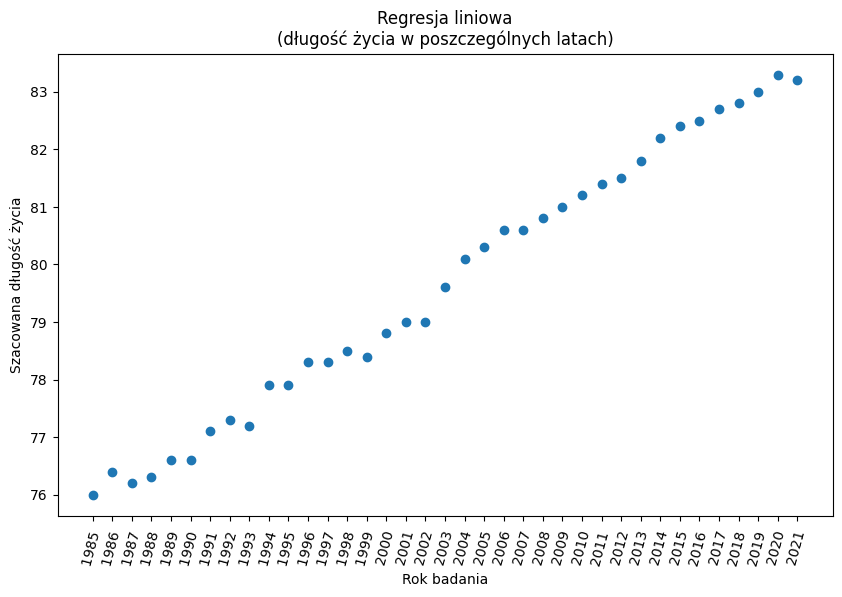

In [ ]:
X = kolumna_nord['year'].tolist()
y = kolumna_nord['dz'].tolist()

# Wizualizacja danych
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.xlabel('Rok badania')
plt.xticks(rotation=75)
plt.ylabel('Szacowana długość życia')
plt.title('Regresja liniowa\n(długość życia w poszczególnych latach)')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Tworzymy model regresji liniowej
# zmiana typu na int
X_train = X_train.astype(int)

# zmiana typu na float
y_train = y_train.astype(float)

# Tworzenie modelu
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Tworzymy model regresji liniowej
model = LinearRegression()
X_train = np.reshape(X_train, (-1, 1))

# Przeksztalcenie do 2d
y_train = np.reshape(y_train, (-1, 1))

# Dopasowujemy model do danych
model.fit(X_train, y_train)

LinearRegression()

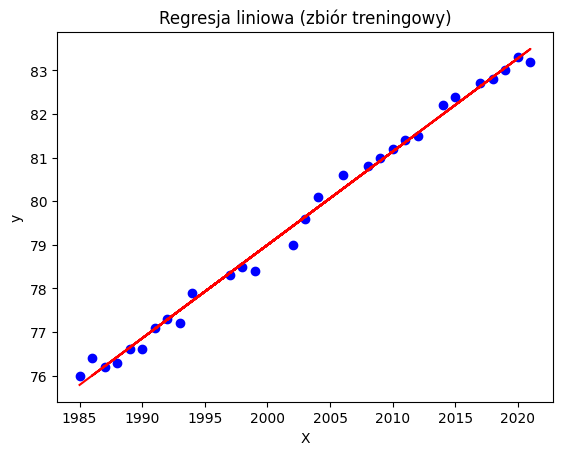

In [ ]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')
# Funkcja predict jest używana do generowania prognoz na podstawie danych X_train.
# W rezultacie otrzymujemy wartości przewidziane przez model.
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresja liniowa (zbiór treningowy)')
plt.show()

In [ ]:
model = LinearRegression()

# Przeksztalcenie do 2d
X_test = np.reshape(X_test, (-1, 1))

# Przeksztalcenie do 2d
y_test = np.reshape(y_test, (-1, 1))

In [ ]:
# Zmiana typu danych
X_test = np.array(X_test).astype(int)
y_test = np.array(y_test).astype(float)

model = LinearRegression()
model.fit(X_test, y_test)

LinearRegression()

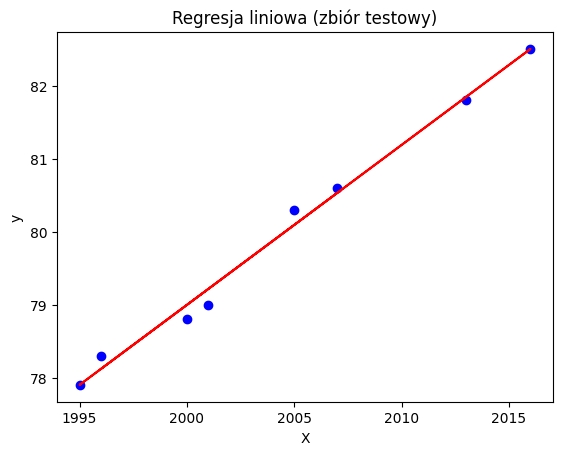

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, model.predict(X_test), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresja liniowa (zbiór testowy)')
plt.show()

In [ ]:
y_pred = model.predict(X_test) # przewidujemy wartości dla zbioru testowego
r2 = r2_score(y_test, y_pred)  # obliczamy współczynnik determinacji

print("Współczynnik determinacji R²:", r2)

Współczynnik determinacji R²: 0.9914486078469672


### Współczynnik jest bliski 1, więc model dobrze przewiduje wartości

In [ ]:
przyszle_lata = np.array([2025, 2030, 2035, 2050, 2096]).reshape(-1, 1) # przewidujemy dlugosc zycia w przyszlosci
lata_przewidywanie = pd.DataFrame({'years':[2025, 2030, 2035, 2050, 2096]})
prognozowana_dl_zycia = model.predict(lata_przewidywanie)
print(prognozowana_dl_zycia)

[[ 84.47329423]
 [ 85.56869404]
 [ 86.66409386]
 [ 89.9502933 ]
 [100.0279716 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Analizda drugiego zbioru danych dotyczących zanieczyszczeń

In [ ]:
## Wczytanie danych dotyczących zanieczyszczenia powietrza w poszczególnych krajach UE
# https://drive.google.com/file/d/1FEC9YHgNuUrKlPvf2mBt1c7JfgT1Yv1_
# https://drive.google.com/file/d/1AGRqM0WEqqSGDajL7rRi9ScXvk99lXSK

file_id_pow = '1AGRqM0WEqqSGDajL7rRi9ScXvk99lXSK'  # identyfikator pliku
url_pow = f'https://drive.google.com/uc?id={file_id_pow}'

gdown.download(url_pow, 'emisja_gazow_ciepl.csv')
data_powietrze = pd.read_csv('emisja_gazow_ciepl.csv', delimiter='\t')

Downloading...
From: https://drive.google.com/uc?id=1AGRqM0WEqqSGDajL7rRi9ScXvk99lXSK
To: /content/emisja_gazow_ciepl.csv
100%|██████████| 58.4k/58.4k [00:00<00:00, 71.7MB/s]


In [ ]:
data_powietrze.head()

,"freq,unit,airpol,src_crf,geo\TIME_PERIOD",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"A,THS_T,CH4,TOTXMEMO,AT",405.21,400.95,390.02,391.57,379.72,376.45,364.12,352.31,345.6,...,267.73,263.42,257.76,254.65,251.78,250.72,242.31,236.98,233.21,233.09
1,"A,THS_T,CH4,TOTXMEMO,BE",460.72,459.12,456.03,448.14,449.37,451.92,446.67,441.75,434.81,...,314.97,308.94,302.77,303.11,301.65,295.11,292.19,289.14,284.7,281.09
2,"A,THS_T,CH4,TOTXMEMO,BG",522.66,480.86,467.36,423.93,352.9,356.06,356.39,343.58,322.02,...,271.27,266.97,264.55,266.24,259.88,254.9,243.06,233.65,229.3,239.38
3,"A,THS_T,CH4,TOTXMEMO,CZ",959.65,909.68,839.97,820.76,770.36,757.37,757.79,736.43,703.89,...,557.54,532.87,532.6,534.72,518.8,510.29,506.8,493.94,468.98,472.6
4,"A,THS_T,CH4,TOTXMEMO,DE",4961.99,4734.16,4590.84,4615.65,4455.56,4355.55,4245.44,4062.34,3861.13,...,2336.02,2300.75,2246.37,2229.87,2168.52,2138.68,2062.94,1958.28,1914.74,1866.25


### Czyszczenie danych

In [ ]:
data_powietrze[['freq', 'unit', 'airpol', 'src_crf', 'geo']] = data_powietrze['freq,unit,airpol,src_crf,geo\\TIME_PERIOD'].str.split(',', expand=True)

In [ ]:
data_powietrze = data_powietrze.drop(['freq','unit','src_crf'],axis=1)

In [ ]:
data_powietrze = data_powietrze.drop(data_powietrze.columns[0], axis=1)

In [ ]:
data_powietrze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    196 non-null    object 
 1   1991    196 non-null    object 
 2   1992    196 non-null    object 
 3   1993    196 non-null    object 
 4   1994    196 non-null    object 
 5   1995    196 non-null    object 
 6   1996    196 non-null    object 
 7   1997    196 non-null    object 
 8   1998    196 non-null    object 
 9   1999    196 non-null    object 
 10  2000    196 non-null    object 
 11  2001    196 non-null    object 
 12  2002    196 non-null    object 
 13  2003    196 non-null    object 
 14  2004    196 non-null    object 
 15  2005    196 non-null    object 
 16  2006    196 non-null    object 
 17  2007    196 non-null    object 
 18  2008    196 non-null    float64
 19  2009    196 non-null    object 
 20  2010    196 non-null    object 
 21  2011    196 non-null    object 
 22  20

In [ ]:
ost_5_kol = data_powietrze.iloc[:, -5:]
ost_5_kol

,2019,2020,2021,airpol,geo
0,236.98,233.21,233.09,CH4,AT
1,289.14,284.7,281.09,CH4,BE
2,233.65,229.3,239.38,CH4,BG
3,493.94,468.98,472.6,CH4,CZ
4,1958.28,1914.74,1866.25,CH4,DE
...,...,...,...,...,...
191,93.54,92.29,92.6,SF6_CO2E,PL
192,24.83,23.61,24.2,SF6_CO2E,PT
193,59.61,62.45,50.17,SF6_CO2E,RO
194,16.44,16.73,16.71,SF6_CO2E,SI


In [ ]:
data_powietrze = data_powietrze.replace(': ', 0)

In [ ]:
# Zmiana typu danych w kolumnach z 'object' na 'float'
data_powietrze_do_czyszczenia = data_powietrze.columns[0:18].tolist() + data_powietrze.columns[19:32].tolist()

# Iteracja
for kolumna in data_powietrze_do_czyszczenia:
    data_powietrze[kolumna] = data_powietrze[kolumna].str.replace(r'[^0-9.]+', '', regex=True)
    data_powietrze[kolumna] = data_powietrze[kolumna].replace('', np.nan).astype(float)

In [ ]:
dane_pow_odwrocone = data_powietrze.transpose()

In [ ]:
dane_pow_odwrocone

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
1990,405.21,460.72,522.66,959.65,4961.99,335.74,79.48,449.89,1475.87,368.03,...,420.89,NaN,0.9,213.05,2162.97,NaN,NaN,0.48,10.13,0.06
1991,400.95,459.12,480.86,909.68,4734.16,344.01,76.82,448.17,1431.19,366.91,...,444.02,NaN,1.01,129.58,2044.35,NaN,NaN,0.51,9.94,0.04
1992,390.02,456.03,467.36,839.97,4590.84,347.62,66.92,453.26,1447.56,364.65,...,445.91,NaN,1.11,138.16,693.23,NaN,NaN,0.46,9.96,0.04
1993,391.57,448.14,423.93,820.76,4615.65,356.18,57.12,454.68,1432.36,365.84,...,457.93,NaN,1.22,144.55,725.37,NaN,NaN,0.49,10.86,0.09
1994,379.72,449.37,352.9,770.36,4455.56,350.78,54.7,457.14,1494.91,364.28,...,502.49,NaN,1.34,184.97,863.29,13.67,NaN,0.69,11.17,18.16
1995,376.45,451.92,356.06,757.37,4355.55,353.7,50.81,462.92,1509.06,355.22,...,700.13,0.05,1.43,263.51,597.6,30.02,14.36,0.92,12.5,10.47
1996,364.12,446.67,356.39,757.79,4245.44,358.32,50.63,468.66,1564.02,351.87,...,784.51,0.05,1.61,268.46,564.44,24.53,14.84,1.46,13.27,11.51
1997,352.31,441.75,343.58,736.43,4062.34,354.16,52.7,468.08,1596.29,347.92,...,837.53,0.08,1.75,291.96,570.09,23.61,15.93,1.3,13.66,11.83
1998,345.6,434.81,322.02,703.89,3861.13,357.11,51.94,480.58,1605.54,337.02,...,707.45,0.52,1.79,263.36,714.48,24.67,16.32,1.37,13.16,13.04
1999,338.52,425.2,306.72,669.16,3819.22,352.52,48.63,473.26,1626.98,328.24,...,476.39,0.56,1.88,247.55,859.22,24.22,17.04,1.53,15.84,13.03


In [ ]:
dane_pow_odwrocone.tail()

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
2019,236.98,289.14,233.65,493.94,1958.28,310.92,43.98,403.48,1483.88,210.64,...,444.33,5.17,10.26,120.74,70.07,93.54,24.83,59.61,16.44,9.14
2020,233.21,284.7,229.3,468.98,1914.74,316.0,43.57,392.14,1483.85,206.89,...,257.18,10.05,9.91,128.4,75.98,92.29,23.61,62.45,16.73,17.73
2021,233.09,281.09,239.38,472.6,1866.25,317.21,43.87,409.9,1487.93,202.51,...,257.5,12.63,9.92,123.87,62.48,92.6,24.2,50.17,16.71,17.44
airpol,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4,...,SF6_CO2E,SF6_CO2E,SF6_CO2E,SF6_CO2E,SF6_CO2E,SF6_CO2E,SF6_CO2E,SF6_CO2E,SF6_CO2E,SF6_CO2E
geo,AT,BE,BG,CZ,DE,DK,EE,EL,ES,FI,...,IT,LT,LU,NL,NO,PL,PT,RO,SI,SK


In [ ]:
kolumna_nor_pow = dane_pow_odwrocone.iloc[:, 126]

In [ ]:
kolumna_nor_pow

In [ ]:
kolumna_nor_pow = kolumna_nor_pow.reset_index()

In [ ]:
kolumna_nor_pow = kolumna_nor_pow.rename(columns={'index': 'year'})

In [ ]:
kolumna_nor_pow = kolumna_nor_pow.set_index('year')

In [ ]:
kolumna_nor_pow.head()

,126
year,
1990,14.56
1991,14.05
1992,12.26
1993,12.93
1994,13.15


In [ ]:
kolumna_nor_pow = kolumna_nor_pow.reset_index(drop=False)

In [ ]:
# zp - zanieczyszczenie powietrza
kolumna_nor_pow = kolumna_nor_pow.rename(columns={kolumna_nor_pow.columns[1]: 'zp'})

In [ ]:
kolumna_nor_pow

,year,zp
0,1990,14.56
1,1991,14.05
2,1992,12.26
3,1993,12.93
4,1994,13.15
5,1995,13.24
6,1996,13.29
7,1997,13.27
8,1998,13.59
9,1999,14.31


In [ ]:
pow_nostr= kolumna_nor_pow.drop([32, 33], axis=0)

In [ ]:
pow_nostr

,year,zp
0,1990,14.56
1,1991,14.05
2,1992,12.26
3,1993,12.93
4,1994,13.15
5,1995,13.24
6,1996,13.29
7,1997,13.27
8,1998,13.59
9,1999,14.31


### Modelowanie

In [ ]:
X2 = pow_nostr['year'] # zmienna niezależna jako ramka danych (DataFrame)
y2 = pow_nostr['zp']

Wizualizacja

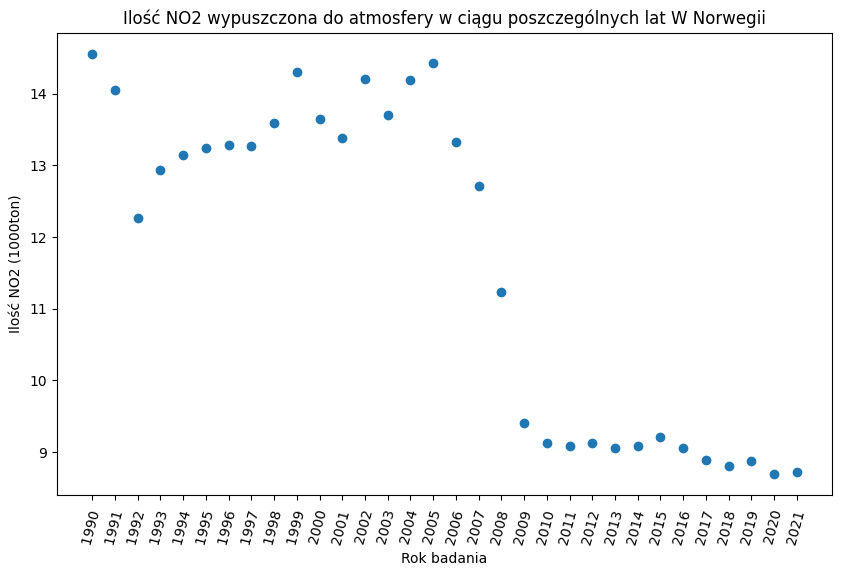

In [ ]:
X2 = pow_nostr['year']
y2 = pow_nostr['zp']

# Wizualizacja danych
plt.figure(figsize=(10, 6))
plt.scatter(X2, y2)
plt.xlabel('Rok badania')
plt.xticks(rotation=75)
plt.ylabel('Ilość NO2 (1000ton)')
plt.title('Ilość NO2 wypuszczona do atmosfery w ciągu poszczególnych lat W Norwegii')
plt.show()

## Ocena

Tendencja jest opadająca, więc można stwierdzić, że wraz ze spadkiem ilości gazów cieplarnianych emitowanych do atmosfery wydłuża się średnia długość życia.